In [1]:
# ---- Reproducibility
import random
import torch

#seed = 1234
#random.seed(seed)
#torch.manual_seed(seed)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed_all(seed)


In [2]:


# ---- Parameters
n, p = 50, 40
noise_std = 0.1

# (Optional) choose device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
u = torch.rand(n, dtype=torch.float64, device=device)          # length n
v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

noisy_matrix = rank_1_matrix + noise

# ---- Print (move to CPU for readability if needed)
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix.cpu().numpy())

print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix.cpu().numpy())


Rank-1 Matrix (Outer Product):
[[4.17774975e-01 1.32883300e-01 2.63872576e-01 ... 1.86608891e-01
  1.01473125e-01 6.58880226e-01]
 [4.17278333e-01 1.32725331e-01 2.63558890e-01 ... 1.86387054e-01
  1.01352496e-01 6.58096963e-01]
 [3.62155167e-01 1.15192092e-01 2.28742319e-01 ... 1.61765012e-01
  8.79636612e-02 5.71161252e-01]
 ...
 [1.91266588e-03 6.08369022e-04 1.20806679e-03 ... 8.54336616e-04
  4.64566321e-04 3.01649884e-03]
 [4.04656752e-01 1.28710736e-01 2.55586920e-01 ... 1.80749332e-01
  9.82868469e-02 6.38191246e-01]
 [3.83385681e-01 1.21944964e-01 2.42151811e-01 ... 1.71248114e-01
  9.31203287e-02 6.04644268e-01]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.4852713   0.06801142  0.31676633 ...  0.23098125  0.07123998
   0.87894764]
 [ 0.45313614 -0.02530799  0.2288758  ...  0.2394843   0.14152327
   0.61367427]
 [ 0.47375655  0.20336774  0.63534383 ...  0.12704854  0.00658421
   0.45537839]
 ...
 [ 0.0910577   0.05960559  0.14826476 ... -0.15859312  0.2259101
   0.07226735]

In [3]:
import sys
import os
import matplotlib.pyplot as plt
from cebmf_torch import cEBMF

In [4]:
mycebmf=  cEBMF(data= noisy_matrix) 

 

In [5]:
mycebmf.initialize()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])

tensor([-0.2096,  0.2272,  0.2917, -0.0306,  0.0380, -0.0124, -0.2045,  0.3503,
         0.0313, -0.0636,  0.4950, -0.2196, -0.2260,  0.1863, -0.1858,  0.0895,
         0.1692,  0.1233,  0.1728, -0.0322,  0.0813,  0.0961, -0.0777,  0.1669,
        -0.0721,  0.1757,  0.0787, -0.1305,  0.1016,  0.1997,  0.1424, -0.1275,
         0.2062, -0.3628,  0.0393, -0.1494,  0.1116, -0.2714,  0.1769, -0.0123,
        -0.0624,  0.1054,  0.0757, -0.0624, -0.1581, -0.4440, -0.1193,  0.2731,
        -0.0332, -0.2131])
tensor([-0.0552, -0.0084,  0.0954,  0.0910, -0.1152,  0.1181, -0.1631, -0.2538,
         0.2156,  0.2025, -0.0202, -0.0338,  0.1624,  0.1141, -0.0299, -0.3159,
         0.2678,  0.0678,  0.1891, -0.1517,  0.2218, -0.0904, -0.0721,  0.1206,
        -0.0890, -0.1846, -0.2488,  0.1427,  0.2467, -0.0266,  0.1499, -0.1026,
        -0.1562, -0.0572, -0.2185,  0.0200,  0.0757, -0.3359,  0.0540, -0.0622])


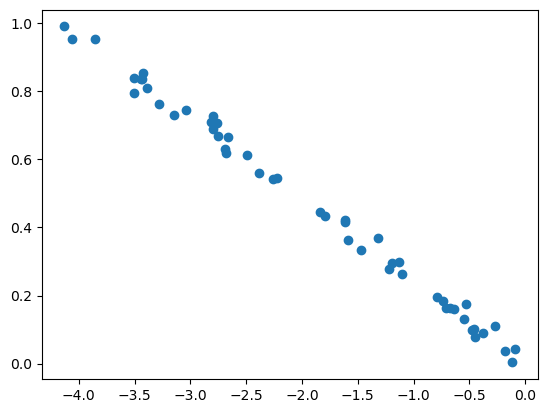

In [6]:
plt.scatter( mycebmf.L[:,0],u)

In [7]:
mycebmf.iter_once()
mycebmf.update_fitted_value()
import numpy as np
K=0
mycebmf.Y_fit 

5


tensor([[ 0.4701,  0.1217,  0.2649,  ...,  0.2454,  0.1172,  0.7393],
        [ 0.4235,  0.1101,  0.2470,  ...,  0.1306,  0.1303,  0.6463],
        [ 0.4407,  0.1196,  0.2920,  ...,  0.1081,  0.0952,  0.6134],
        ...,
        [ 0.0418, -0.0084,  0.0309,  ..., -0.0611,  0.0429,  0.0278],
        [ 0.4102,  0.1127,  0.2423,  ...,  0.1810,  0.0948,  0.6383],
        [ 0.3676,  0.0983,  0.1895,  ...,  0.2165,  0.0956,  0.6510]])

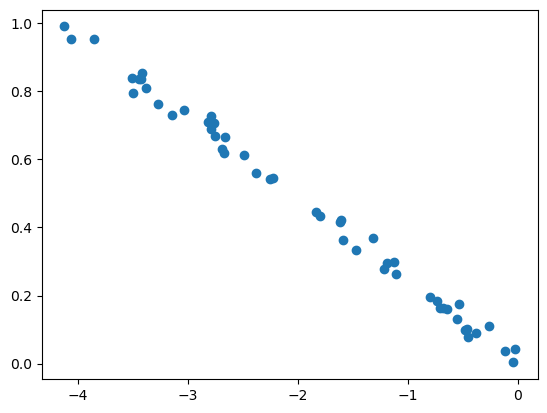

In [8]:
plt.scatter( mycebmf.L[:,0],u)

Converged after 57 iterations.
5


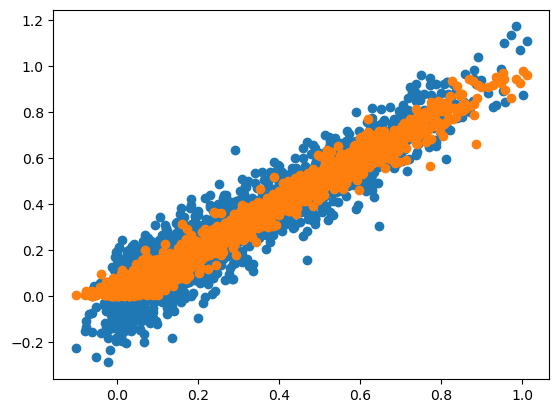

In [9]:
mycebmf.iter_once()  
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

In [10]:
mycebmf=  cEBMF(data= noisy_matrix) 
mycebmf.initialize()

In [11]:
mycebmf.fit()

5
Converged after 57 iterations.
5
Converged after 55 iterations.
4
3
Converged after 66 iterations.
Converged after 54 iterations.
Converged after 57 iterations.
3


CEBMFResult(L=tensor([[-3.0834],
        [-2.7373],
        [-2.6339],
        [-0.5232],
        [-3.2121],
        [-3.3757],
        [-1.5789],
        [-0.3703],
        [-2.1791],
        [-0.0198],
        [-1.2896],
        [-1.1077],
        [-4.0445],
        [-3.7775],
        [-0.6277],
        [-0.7205],
        [-3.3145],
        [-0.2273],
        [-3.3513],
        [-0.6625],
        [-3.4300],
        [-2.6232],
        [-1.1669],
        [-2.7593],
        [-0.4421],
        [-1.0828],
        [-1.4419],
        [-2.2128],
        [-1.5815],
        [-0.4654],
        [-1.7601],
        [-0.6932],
        [-1.5589],
        [-0.4510],
        [-1.1941],
        [-3.9816],
        [-0.0852],
        [-2.9735],
        [-0.7763],
        [-2.4445],
        [-2.6076],
        [-3.4381],
        [-2.3356],
        [-0.5414],
        [-1.8034],
        [-2.7409],
        [-3.3654],
        [-0.0332],
        [-2.7057],
        [-2.6984]]), F=tensor([[-0.1509],
        [-0.0

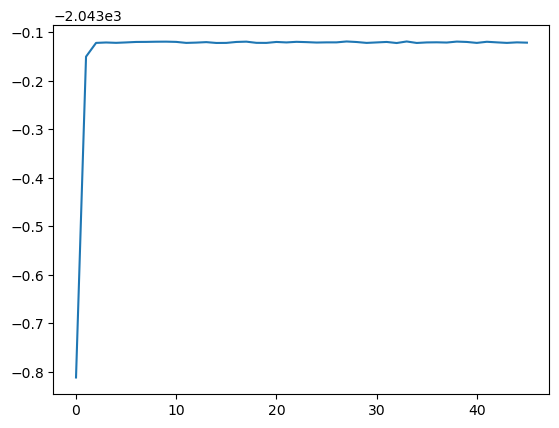

In [12]:
plt.plot(mycebmf.obj)

tensor(0.0019, dtype=torch.float64)

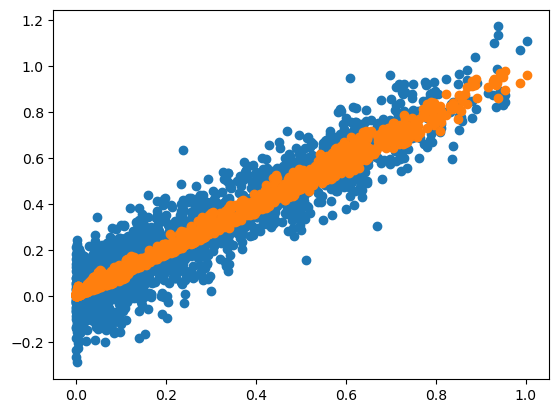

In [13]:
mycebmf.update_fitted_value()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)

In [ ]:
results =[]
for i in range(200):
    # Parameters
    n, p = 50, 40
    noise_std = 0.1

# (Optional) choose device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ---- Data generation (PyTorch)
# Use float64 to mirror NumPy defaults
    u = torch.rand(n, dtype=torch.float64, device=device)          # length n
    v = torch.rand(p, dtype=torch.float64, device=device)          # length p

# Rank-1 matrix via outer product
    rank_1_matrix = torch.outer(u, v)                              # (n, p)

# Homoscedastic Gaussian noise
    noise = noise_std * torch.randn(n, p, dtype=torch.float64, device=device)

    noisy_matrix = rank_1_matrix + noise

 
# Add homoscedastic Gaussian noise (constant variance across the matrix)
    mycebmf=  cEBMF(data= noisy_matrix) 
    mycebmf.initialize()
    mycebmf.fit()
    
    mycebmf.update_fitted_value()
    
    rr = torch.sqrt(torch.mean(mycebmf.Y_fit- rank_1_matrix)**2)
    results.append( rr)
 

5
5
Converged after 55 iterations.
Converged after 68 iterations.
Converged after 54 iterations.
Converged after 70 iterations.
Converged after 54 iterations.
Converged after 67 iterations.
Converged after 54 iterations.
5
5
Converged after 56 iterations.
5
Converged after 55 iterations.
4
Converged after 55 iterations.
Converged after 56 iterations.
3
5
5
Converged after 66 iterations.
Converged after 54 iterations.
Converged after 67 iterations.
Converged after 54 iterations.
5
Converged after 67 iterations.
Converged after 54 iterations.
3
2
2
2
2
2
Converged after 55 iterations.
2
5
5
Converged after 55 iterations.
Converged after 68 iterations.
Converged after 54 iterations.
5
3
Converged after 67 iterations.
Converged after 54 iterations.
3
Converged after 59 iterations.
2
5
5
Converged after 57 iterations.
5
4
Converged after 65 iterations.
Converged after 54 iterations.
4
3
3
3
3
3
Converged after 67 iterations.
Converged after 54 iterations.
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2

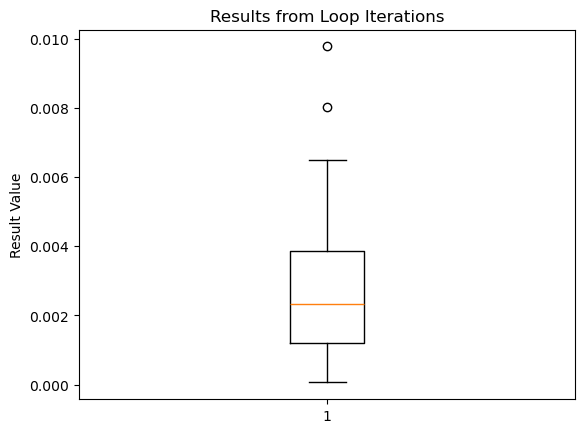

In [ ]:
plt.boxplot(results)
plt.title("Results from Loop Iterations")
plt.ylabel("Result Value")
plt.show()

In [ ]:
res= np.asarray(results)
np.mean(res )

0.002615278465597284